In [3]:
#【例4-1】Python对《红楼梦》人物实现词频统计
from jieba import lcut

excludes=['什么','一个','我们','那里','你们','如今','说道','知道','老太太','不是','没有','两个',
'起来','出来','这里','他们','众人','自己','一面','太太','只见','怎么','奶奶','不知','这个','听见','这样',
'进来','咱们','告诉','就是','东西','回来','只是','大家','姑娘','老爷','只得','丫头','这些','不敢','出去',
'所以','不过','的话','不好','姐姐','一时','不能','过来','心里','二爷','如此','今日','银子','几个',
'答应','二人','还有','这么','说话','一回','只管','那边','这话','外头','打发','自然','今儿','罢了',
'屋里','那些','听说','小丫头','如何','问道','看见'] # 词频排名在前20人之前的无关词，根据执行结果逐个列出剔除。

#读文本文件
txt = open("./lib/doc/红楼梦.txt","r", encoding = 'utf-8').read()
words=lcut(txt) #分词
counts={}

for word in words:
    if len(word) == 1:
        continue
    elif word == '宝玉' or word == '贾宝玉':
        rword = '宝玉'
    elif word == '黛玉' or word == '林黛玉':
        rword = '黛玉'
    elif word == '宝钗' or word == '薛宝钗':
        rword = '宝钗'
    elif word == '风姐' or word == '风姐儿':
        rword = '风姐'

    else:
        rword = word
    counts[rword]=counts.get(rword,0) + 1
    
for word in excludes:
    del(counts[word]) #剔除非人名的无关词
    
items=list(counts.items())
items.sort(key=lambda x:x[1],reverse = True) #将items 按照降序排列

for i in range(10):
    word,count =items[i]
    print("{}:{}".format(word,count),end=",")


Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\David\AppData\Local\Temp\jieba.cache
Loading model cost 2.290 seconds.
Prefix dict has been built succesfully.


宝玉:3766,贾母:1228,凤姐:1100,王夫人:1011,黛玉:840,贾琏:670,宝钗:595,平儿:588,袭人:585,凤姐儿:470,

In [ ]:
#【例4-2】Python使用百度翻译API实现机器翻译
import http.client
import hashlib
import urllib.request
import random
import json

appid = '20190212000266052' #你的appid
secretKey = '_2xr2KsxHq5ntt0OaivX' #你的密钥

httpClient = None
myurl = 'http://api.fanyi.baidu.com/api/trans/vip/translate'

#输入要翻译的单词或短语
phrase ="As you grow older, you'll find the only things you regret are the things you didn't do."
phase="Life's like rollercoaster, up and down. Which means, however bad or good a situation is, it'll change."

#输入英文输出中文
fromLang = 'en'   
toLang = 'zh'     
salt = random.randint(32768, 65536)
sign = appid+phrase+str(salt)+secretKey
m1 = hashlib.new('md5')
m1.update(sign.encode('utf-8'))
sign=m1.hexdigest() #计算签名sign（对字符串1做md5加密)

myurl = myurl+'?q='+urllib.request.quote(phrase)+'&from='+fromLang+'&to='+toLang+'&appid='+appid+'&salt='+str(salt)+'&sign='+sign
try:
    httpClient = http.client.HTTPConnection('api.fanyi.baidu.com')
    httpClient.request('GET', myurl)
    #response是HTTPResponse对象
    response = httpClient.getresponse()
    result=response.read()
    data = json.loads(result)
    wordMean=data['trans_result'][0]['dst']
    print("输入短语:",phrase)
    print("翻译结果:",wordMean)

except Exception as e:
    print(e)
finally:
    if httpClient:
         httpClient.close()

In [ ]:
#【参考程序】Python使用百度翻译API实现机器翻译
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import requests
import json
import hashlib
import random

def md5_sign(s):
    return hashlib.md5(s.encode('utf8')).hexdigest()

def baidu_fanyi(q):
    url = "http://api.fanyi.baidu.com/api/trans/vip/translate"
    fr = 'en'   #英译中
    to = 'zh'
#   f = 'zh'      #中译英
#   to = 'en'
    appid = '20190212000266052'   
    salt = random.randint(32768, 65536)
    key = '_2xr2KsxHq5ntt0OaivX'  # 自己申请
    finial_str = '%s%s%s%s' % (appid, q, salt, key)
    sign = md5_sign(finial_str)  #生成签名sign（对字符串1做md5加密）
    #post请求参数
    params = {'q': q,
              'from':fr,
              'to': to,
              'appid': appid,
              'salt': salt,
              'sign': sign} 
    res_json = requests.get(url, params=params).json()
    res = res_json['trans_result'][0]["dst"]
    print(res)

if __name__ == '__main__':
    phase="近年来，随着基于深度神经网络的翻译技术的出现，带动了机器翻译技术的突变"
    baidu_fanyi(phase)
    phase="As you grow older, you'll find the only things you regret are the things you didn't do."
    baidu_fanyi(phase)
    phase="Life's like rollercoaster, up and down. Which means, however bad or good a situation is, it'll change."
    baidu_fanyi(phase)

In [ ]:
#【例4-4】Python用pyaudio库录制音频文件
#filename:speech_recording.py
import pyaudio
import wave
import datetime

def speech_recording():
    CHUNK = 1024        #定义数据流块大小
    FORMAT = pyaudio.paInt16  #采样值的量化格式
    CHANNELS = 1 #声道数
    RATE = 16000 #采样频率 
    RECORD_SECONDS = 20 #录制时间
    WAVE_OUTPUT_FILENAME = ".\lib\media\output.wav" #输出wave文件
    p = pyaudio.PyAudio() #调用 pyaudio.PyAudio()类，并实例化
    stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)
    print("* recording.....")
    frames = []
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)
    print("* done recording")
    stream.stop_stream()
    stream.close()
    p.terminate()
    wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()
speech_recording()
"""
语音识别技术是指将人说话的语音信号转换为可被计算机识别
的文字信息，从而识别说话人的语音指令以及文字内容的技术。
"""

In [ ]:
#【例4-5】Python使用百度API实现语言识别
import pyaudio,wave 
from aip import AipSpeech
def Speech_Recognition():
    """输入你的APPID AK SK """
    APP_ID = '15540469'
    API_KEY = 'XLI8ev18oWaiye0S3WgvhtLL'
    SECRET_KEY = 'pjzGx3WoF1hmEEkIpsmWCkuZvG7GzbXH '
    client = AipSpeech(APP_ID, API_KEY, SECRET_KEY)
    file_handle = open('.\lib\media\output.wav', 'rb')  
    file_content = file_handle.read()  
    result=client.asr(file_content, 'pcm', 16000, {
        'dev_pid': '1536'})
    if result['err_no'] == 0:  
        print("语音识别输出>> " + result['result'][0]) 
    else:  
        print(str(result['err_no'])) 

Speech_Recognition()

In [ ]:
#【例4-6】Python使用百度API实现语言合成
from aip import AipSpeech
APP_ID = '15540469'
API_KEY = 'XLI8ev18oWaiye0S3WgvhtLL'
SECRET_KEY = 'pjzGx3WoF1hmEEkIpsmWCkuZvG7GzbXH'
client = AipSpeech(APP_ID, API_KEY, SECRET_KEY)
result = client.synthesis(text = '语音合成技术', options={'vol':5}) #vol音量
if not isinstance(result,dict):
    with open('audio.mp3','wb') as f:
        f.write(result)
else:print(result)

In [ ]:
#【例4-7】用Python实现将彩色图像转换成灰度图像
from PIL import Image
import matplotlib.pyplot as plt
img=Image.open('.\lib\picture\Lena.png')
gray=img.convert('L')
plt.figure("Lena") 
plt.imshow(gray,cmap='gray')  
plt.axis('off')
plt.show()

In [4]:
#【例4-8】用Python实现将RGB彩色图像转换为数字矩阵
from PIL import Image
import numpy as np
img=np.array(Image.open('.\lib\picture\Lena.png'))  #打开图像并转化为数字矩阵
print(img.shape)  #显示数字矩阵的维度
print(img.size)   #显示数字矩阵的大小
print(img[0])     #显示数字矩阵的像素值

(512, 512, 3)
786432
[[226 137 125]
 [226 137 125]
 [223 137 133]
 ...
 [230 148 122]
 [221 130 110]
 [200  99  90]]


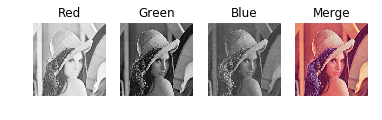

In [6]:
#【例4-9】用Python将彩色图像分离成RGB通道
from PIL import Image
import matplotlib.pyplot as plt
img=Image.open('.\lib\picture\Lena.png')  #打开图像
r,g,b=img.split()   #分离三通道
plt.subplot(1,4,1), plt.title('Red')
plt.imshow(r,cmap='gray'),plt.axis('off') #显示r通道
plt.subplot(1,4,2), plt.title('Green')
plt.imshow(g,cmap='gray'),plt.axis('off') #显示g通道
plt.subplot(1,4,3), plt.title('Blue')
plt.imshow(b,cmap='gray'),plt.axis('off') #显示b通道
pic=Image.merge('RGB',(r,g,b)) #合并三通道 
plt.subplot(1,4,4), plt.title('Merge'),plt.axis('off') #显示通道合成后图像
plt.imshow(pic)
plt.show()

In [ ]:
#【例4-12】Python利用百度API实现图像识别
import requests
import base64
import matplotlib.pyplot as plt
from PIL import Image

# 显示要识别的图片
img = Image.open('./lib/picture/animal_demo.png')#读图像文件
plt.imshow(img)
plt.axis('off')
plt.show()
#读图像数据
f = open('./lib/picture/animal_demo.png', 'rb') 
img = base64.b64encode(f.read())  #图像数据用base64编码

host = 'https://aip.baidubce.com/rest/2.0/image-classify/v2/advanced_general' #
headers={'Content-Type':'application/x-www-form-urlencoded'}
access_token= '24.9550543f6fb050da84ba9eb33c348895.2592000.1552517153.282335-15544413'
host=host+'?access_token='+access_token

img_dict={}   #定义img_dict字典
img_dict['access_token']=access_token #access_token添加至字典
img_dict['image'] =img      #图片信息添加至字典
res = requests.post(url=host,headers=headers,data=img_dict) #请求提交给网址
req=res.json()    #json格式返回图像识别信息
print(req['result'])

In [10]:
#获取百度API Access Token通用程序
from urllib import request
import ssl
import json

APP_ID = '15555155'
API_KEY = 'wbek7K56TdGMY04b8GPKS6x5'
SECRET_KEY = 'V8BNSsp05sagwWtDznpwwxwwzIwdP5N7'

gcontext = ssl.SSLContext(ssl.PROTOCOL_TLSv1)
# client_id 为官网获取的AK， client_secret 为官网获取的SK
host = 'https://aip.baidubce.com/oauth/2.0/token?grant_type=client_credentials&client_id=wbek7K56TdGMY04b8GPKS6x5&client_secret=V8BNSsp05sagwWtDznpwwxwwzIwdP5N7'
req = request.Request(host)
response = request.urlopen(req, context=gcontext).read().decode('UTF-8')
result = json.loads(response)
if (result):
    print(result)

{'refresh_token': '25.7ec95c880a1cca54d86d6f5099a0c9c3.315360000.1869206934.282335-15555155', 'expires_in': 2592000, 'session_key': '9mzdD0GhJff+FIsum4dh7YGa1AuiJ2444XHVkrIkPrDOAgljyGo10i1r0pjI5hdvbZ3P92+3qZ8K09BKX51VoxxWdKImRw==', 'access_token': '24.4ea3bb7c176252c1b52fb965dad0bec5.2592000.1556438934.282335-15555155', 'scope': 'vis-faceverify_vis-faceverify-detect public brain_all_scope vis-faceverify_faceverify_h5-face-liveness vis-faceverify_FACE_V3 wise_adapt lebo_resource_base lightservice_public hetu_basic lightcms_map_poi kaidian_kaidian ApsMisTest_Test权限 vis-classify_flower lpq_开放 cop_helloScope ApsMis_fangdi_permission smartapp_snsapi_base iop_autocar oauth_tp_app smartapp_smart_game_openapi oauth_sessionkey smartapp_swanid_verify smartapp_opensource_openapi', 'session_secret': '59203e0ef72e47f14b276de4a75a72b0'}


In [38]:
#【例4-14】Python利用OpenCV捕获视频帧并保存为AVI文件
#按q键退出

import numpy as np
import cv2 as cv

# 捕获摄像头
cap = cv.VideoCapture(0)
# 定义编解码器，创建VideoWriter 对象
#fourcc是一种编码格式，保存视频时要指定文件名、编码格式、码率(fps)、帧的尺寸等参数
fourcc = cv.VideoWriter_fourcc(*'XVID') #使用VideoWriter类和write()函数
out = cv.VideoWriter('.\lib\media\output.avi',fourcc, 20.0, (640,480))#保存为avi视频格式
while(cap.isOpened()):
    ret, frame = cap.read()#开始捕获，通过read()函数获取捕获的帧
    if ret==True:
        frame = cv.flip(frame,1) #翻转图像（1水平翻转、0垂直翻转、-1水平垂直翻转）
        out.write(frame)# write the flipped frame
        cv.imshow('Video Capture',frame)  #Video Capture为窗口名称  
        if cv.waitKey(1) & 0xFF == ord('q'): #waitKey(1)键盘事件等待函数,按q键退出
            break
    else:
        break

# 退出时，释放资源
cap.release()
out.release()
cv.destroyAllWindows()

In [10]:
#【例4-15】利用face_recognition库实现人脸关键点识别
# 导入pil模块 ，可用命令安装 apt-get install python-Imaging
from PIL import Image, ImageDraw
#安装face_recognition之前需要先安装编译dlib
# 导入face_recogntion模块，可用命令安装 pip install face_recognition
import face_recognition

# 将jpg文件加载到numpy 数组中
image = face_recognition.load_image_file(".\lib\picture\Pierce_Brosnan_0001.jpg")
#查找图像中所有面部的所有面部特征
face_landmarks_list = face_recognition.face_landmarks(image)
print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))
for face_landmarks in face_landmarks_list:
   #图像中每个面部特征的位置
    facial_features = [
        'chin',
        'left_eyebrow',
        'right_eyebrow',
        'nose_bridge',
        'nose_tip',
        'left_eye',
        'right_eye',
        'top_lip',
        'bottom_lip'
    ]

    for facial_feature in facial_features:
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

   #在图像中描绘出每个人脸特征！
    pil_image = Image.fromarray(image)
    d = ImageDraw.Draw(pil_image)
        
    for facial_feature in facial_features: #输出每个人的特征值
        d.line(face_landmarks[facial_feature], width=2)
    pil_image.show() #显示特征值图片 


I found 1 face(s) in this photograph.
The chin in this face has the following points: [(27, 115), (27, 136), (29, 158), (33, 178), (44, 195), (60, 210), (79, 222), (98, 231), (116, 234), (131, 228), (141, 214), (150, 199), (157, 183), (161, 165), (163, 148), (164, 131), (163, 114)]
The left_eyebrow in this face has the following points: [(63, 107), (75, 99), (88, 98), (102, 100), (115, 104)]
The right_eyebrow in this face has the following points: [(135, 105), (143, 101), (151, 97), (159, 97), (163, 103)]
The nose_bridge in this face has the following points: [(125, 115), (128, 126), (130, 138), (132, 150)]
The nose_tip in this face has the following points: [(112, 156), (120, 158), (127, 160), (133, 159), (137, 156)]
The left_eye in this face has the following points: [(80, 114), (88, 111), (95, 111), (101, 115), (95, 116), (87, 116)]
The right_eye in this face has the following points: [(135, 114), (141, 109), (148, 109), (152, 112), (148, 115), (142, 115)]
The top_lip in this face h

In [9]:
#【例4-15:人脸识别扩展程序1】dlib检测人脸landmarks,68个标定点
#参考链接
#https://github.com/vipstone/faceai

import cv2
import dlib
import face_recognition
path = ".\lib\picture\Pierce_Brosnan_0001.jpg"
img = cv2.imread(path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
#人脸分类器
detector = dlib.get_frontal_face_detector()
# 获取人脸检测器
predictor = dlib.shape_predictor(".\lib\shape_predictor_68_face_landmarks.dat")
 
dets = detector(gray, 1)
for face in dets:
    shape = predictor(img, face)  # 寻找人脸的68个标定点
    # 遍历所有点，打印出其坐标，并圈出来
    for pt in shape.parts():
        pt_pos = (pt.x, pt.y)
        cv2.circle(img, pt_pos,2, (255, 255, 255), 1)#，指定白色，-1是实心园
    cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 【4-15人脸识别扩展程序2】利用face_recognition库检测人脸之二，用框图表示人脸
#参考程序：应用一个基于Python的开源人脸识别库，face_recognition

import face_recognition
import cv2

# 读取图片并识别人脸
img = face_recognition.load_image_file(".\lib\picture\Pierce_Brosnan_0001.jpg")
face_locations = face_recognition.face_locations(img)
print(face_locations)

# 调用opencv函数显示图片
img = cv2.imread(".\lib\picture\Pierce_Brosnan_0001.jpg")
#cv2.namedWindow("ddd")
cv2.imshow("face_recognition",img)

# 遍历每个人脸，并标注
faceNum = len(face_locations)
for i in range(0, faceNum):
    top =  face_locations[i][0]
    right =  face_locations[i][1]
    bottom = face_locations[i][2]
    left = face_locations[i][3]
    start = (left, top)
    end = (right, bottom)
    color = (55,255,155)
    thickness = 2
    cv2.rectangle(img, start, end, color, thickness)

# 显示识别结果
cv2.namedWindow("Face_Recognition") 
cv2.imshow("Face_Recognition",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[(82, 182, 211, 53)]


In [2]:
#【4-16】利用face_recognition库实现人脸识别并匹配
from PIL import Image, ImageDraw
import cv2
import face_recognition

image1 = face_recognition.load_image_file(".\lib\picture\Pierce_Brosnan_0003.jpg")
image2 = face_recognition.load_image_file(".\lib\picture\Jose_Maria_Aznar_0002.jpg")
unknown_image = face_recognition.load_image_file("./lib/picture/unknown.jpg")


image1_encoding = face_recognition.face_encodings(image1)[0]
image2_encoding = face_recognition.face_encodings(image2)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

results = face_recognition.compare_faces([image1_encoding, image2_encoding], unknown_encoding )
labels = ['"Pierce_Brosnan', 'Jose_Maria']
print('results:'+str(results))
for i in range(0, len(results)):
    if results[i] == True:
        print('The person is:'+labels[i])


results:[False, True]
The person is:Jose_Maria


In [14]:
#【例4-15扩展程序】对照片人物美颜
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file(".\lib\picture\Three_man.jpg")
# Find all facial features in all the faces in the image

face_landmarks_list = face_recognition.face_landmarks(image)
for face_landmarks in face_landmarks_list:
    pil_image = Image.fromarray(image)
    d = ImageDraw.Draw(pil_image, 'RGBA')
    # Make the eyebrows into a nightmare
    d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
    d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
    d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
    d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)
    # Gloss the lips
    d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
    d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
    d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=5)
    d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=5)
    # Sparkle the eyes
    d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
    d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))
    # Apply some eyeliner
    d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
    d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)
    pil_image.show()

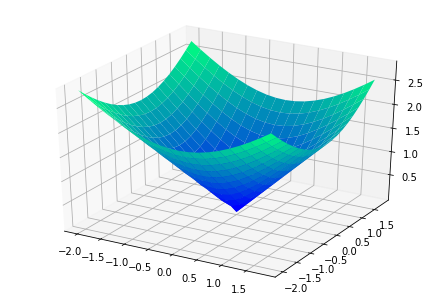

In [2]:
#【例4-17】用Python绘制三维曲面图形
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 载入3D模块

fig = plt.figure() #定义画布
ax = Axes3D(fig) # 创建 3D 图形对象
# 生成三维数据
X = np.arange(-2, 2, 0.2)
Y = np.arange(-2, 2, 0.2)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X ** 2 + Y ** 2)
ax.plot_surface(X, Y, Z, cmap=plt.cm.winter) # 绘制曲面图，并使用 cmap 着色
plt.show()  #显示图形

D:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


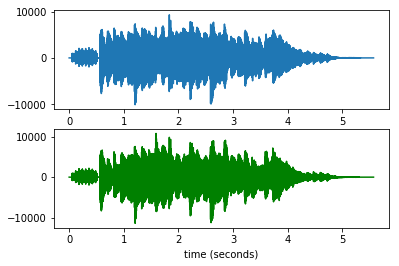

In [19]:
#【参考示例】用Python读取Wav音频文件数据并显示波形
"""
Wave文件作为最经典的Windows多媒体音频格式，应用非常广泛。
Python提供有专门的内置wave库用于处理wav文件，所以可以直接获得Wav音频文件的参数，
并利用该库画wav音频文件波形图。
wave库使用四个参数来表示声音特征：nchannels（声道数），sampwidth
（量化位数：byte）framerate（采样频率）和nframes:采样点数，
通过调用getparams()方法可以获得这些参数的值。
本示例的样本文件来自于Windows系统自带的音频文件Alarm01.wav,全部代码请参考课程资源
"""
import wave  #导入wave库
import matplotlib.pyplot as plt #导入绘图库
import numpy as np

f = wave.open(r".\lib\media\Alarm01.wav", "rb") # 打开WAV文档
# 读取格式信息(nchannels, sampwidth, framerate, nframes, comptype, compname)
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4] #返回wav文件参数
str_data = f.readframes(nframes) # 读取波形数据
f.close()

wave_data = np.fromstring(str_data, dtype=np.short) #将波形数据转换为数组
if nchannels == 2: #判定音频通道数
    wave_data.shape = -1, 2
    wave_data = wave_data.T
    time = np.arange(0, nframes) * (1.0 / framerate)
    plt.subplot(211) # 绘制波形
    plt.plot(time, wave_data[0])
    plt.subplot(212)
    plt.plot(time, wave_data[1], c="g")
    plt.xlabel("time (seconds)")
    plt.show()


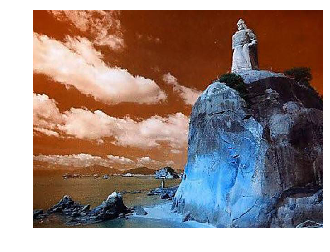

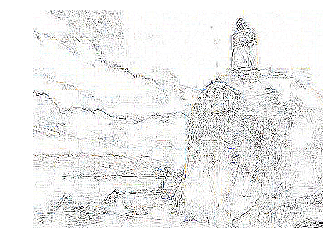

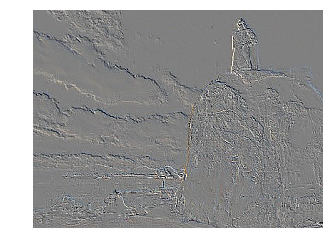

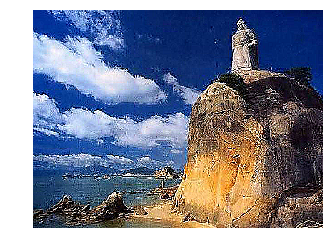

In [28]:
#【参考示例】】使用PIL库的ImageFilter类实现对图像滤波
#使用PIL库的ImageFilter类实现对图像滤波
from PIL import Image
from PIL import ImageFilter
import matplotlib.pyplot as plt

im = Image.open('./lib/picture/gulangyu.jpg')
r, g, b = im.split()
om = Image.merge("RGB", (b, g, r)) #分离RGB通道颜色 
plt.imshow(om)
plt.axis('off')
plt.show()
om = im.filter(ImageFilter.CONTOUR) #加强滤波效果
plt.imshow(om)
plt.axis('off')
plt.show()
om = im.filter(ImageFilter.EMBOSS) #浮雕滤波效果
plt.imshow(om)
plt.axis('off')
plt.show()
om = im.filter(ImageFilter.EDGE_ENHANCE)#边界增强滤波效果
plt.imshow(om)
plt.axis('off')
plt.show()

In [ ]:
#【参考示例】Python提取GIF视频的图像帧

from PIL import Image
import os

gifFileName = './lib/Cheetah.gif'
#使用Image模块的open()方法打开gif动态图像时，默认是第一帧
im = Image.open(gifFileName)
pngDir = gifFileName[:-4]
os.mkdir(pngDir) #创建存放每帧图片的文件夹
try:
  while True:
    current = im.tell() 
    im.save(pngDir+'/'+str(current)+'.png')  #保存当前帧图片
    im.seek(current+1)  #获取下一帧图片
except EOFError:
    pass
#  程序运行后在当前文件夹下创建Cheetah目录

(-0.5, 511.5, 511.5, -0.5)

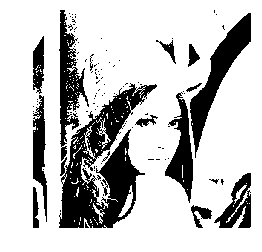

In [25]:
#【参考示例】将lena图像二值化，像素值大于128的变为1，否则变为0
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
img=np.array(Image.open('./lib/picture/Lena.png').convert('L'))

rows,cols=img.shape
for i in range(rows):
    for j in range(cols):
        if (img[i,j]<=100):
            img[i,j]=0
        else:
            img[i,j]=1
            
plt.figure("lena")
plt.imshow(img,cmap='gray')
plt.axis('off')

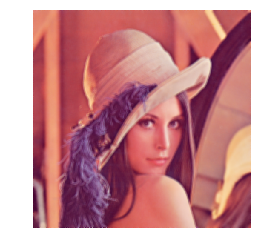

In [26]:
#【参考示例】图像模糊
from PIL import Image
from PIL import ImageFilter
im = Image.open('./lib/picture/Lena.png')
om = im.filter(ImageFilter.BLUR)
plt.imshow(om)
plt.axis('off')
plt.show()